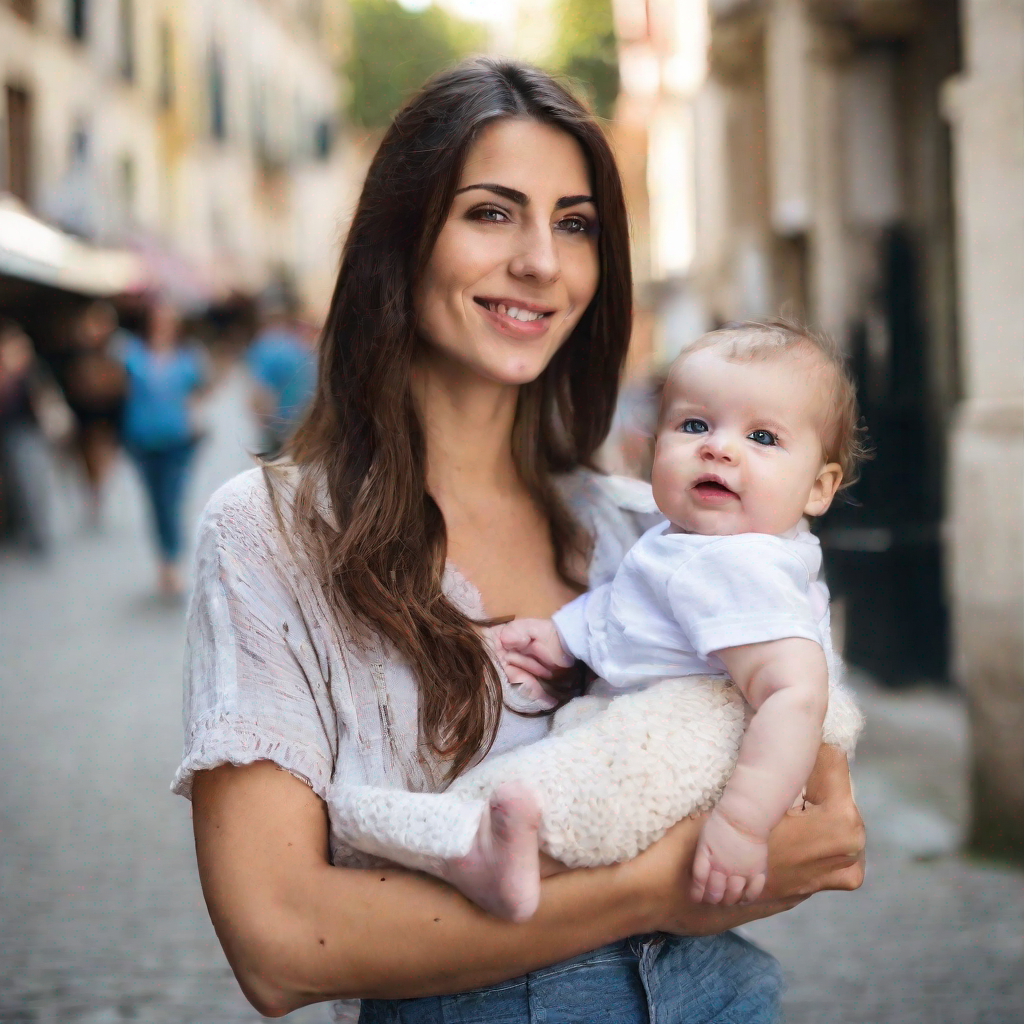

In [11]:
import base64
import IPython.display as display
from PIL import Image
from io import BytesIO
import requests
import json

# Input arguments:
# 1. Prompt: The main prompt for the image generation (e.g., "A beautiful and sexy girl")
# 2. Negative prompt: A negative prompt to guide the image generation away from certain concepts
# 3. Seed: A random seed for reproducible results
# 4. Width: The width of the generated image
# 5. Height: The height of the generated image
# 6. Guidance scale: A value that controls the influence of the guidance prompts
# 7. Number of inference steps: The number of steps used in the image generation process
# 8. Secret token: The secret token for authentication

API_URL = "http://localhost:7860/api/run"
SECRET_TOKEN = 'default_secret'
input_list = [
    "Beautiful woman with in the street with a baby",
    "",
    0,
    1024,
    1024,
    0.0,
    4,
    SECRET_TOKEN,
]
params = {"data": input_list}
response = requests.post(API_URL, json=params)

# Check response status and display the image
if response.status_code == 200:
    response_json = response.json()
    base64_img = response_json["data"][0].split(",")[-1]
    img_data = base64.b64decode(base64_img)
    img = Image.open(BytesIO(img_data))
    display.display(img)
else:
    print(f"Error: {response.status_code}")
    print(response.text)
